In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
titanic = pd.read_csv('/content/test.csv')

In [4]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
print(titanic.describe(include='all'))

        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN         NaN  Kelly, Mr. James  male         NaN   
freq            NaN         NaN                 1   266         NaN   
mean    1100.500000    2.265550               NaN   NaN   30.272590   
std      120.810458    0.841838               NaN   NaN   14.181209   
min      892.000000    1.000000               NaN   NaN    0.170000   
25%      996.250000    1.000000               NaN   NaN   21.000000   
50%     1100.500000    3.000000               NaN   NaN   27.000000   
75%     1204.750000    3.000000               NaN   NaN   39.000000   
max     1309.000000    3.000000               NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin Embarked  
count   418.000000  418.000000       418  417.000000              

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
titanic.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [9]:
titanic.isna().sum() / len(titanic) * 100

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


<ipython-input-10-5cacf2afc640>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'], color='red')
<ipython-input-10-5cacf2afc640>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'], color='blue')


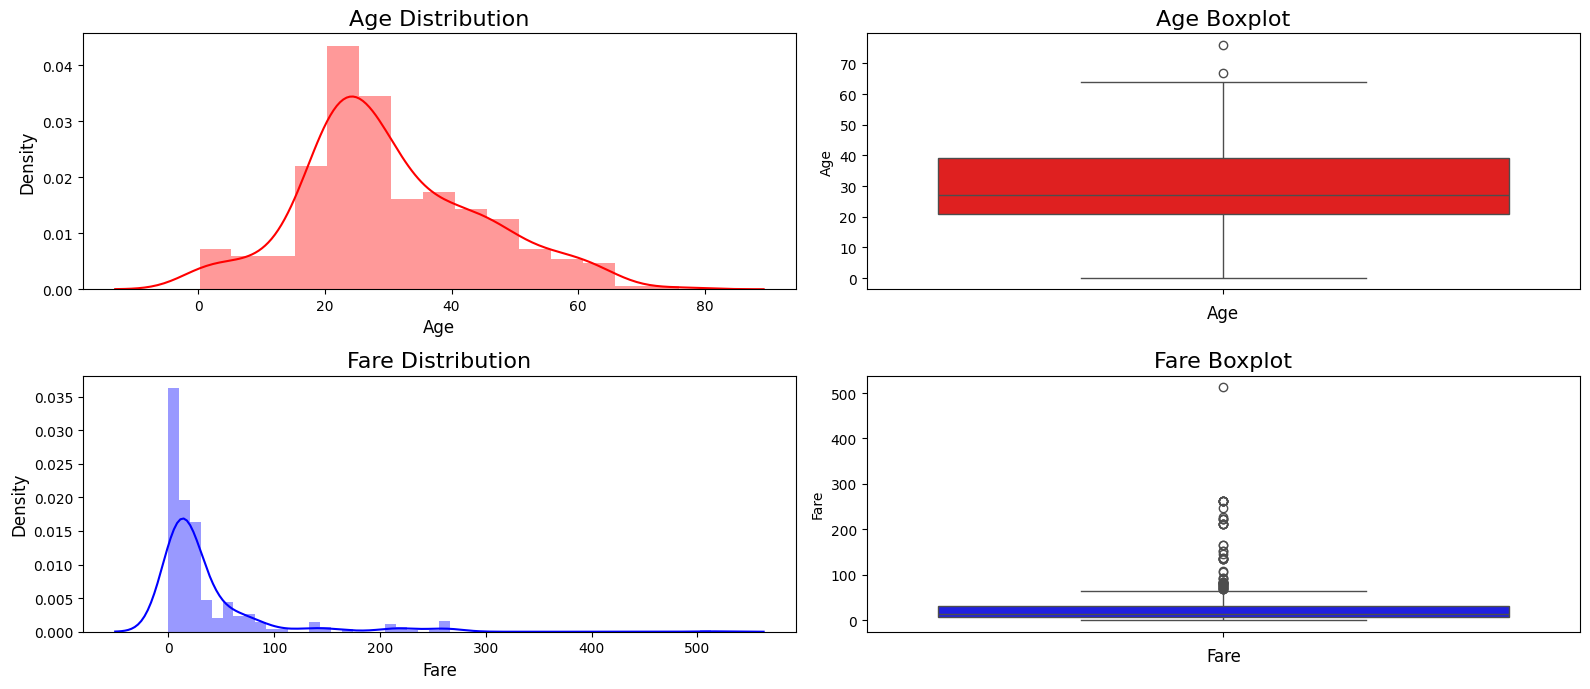

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.distplot(titanic['Age'], color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(titanic['Age'], color='red')
plt.title('Age Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.subplot(2, 2, 3)
sns.distplot(titanic['Fare'], color='blue')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(titanic['Fare'], color='blue')
plt.title('Fare Boxplot', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-11-8358b5ff3807>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic, palette=colors)


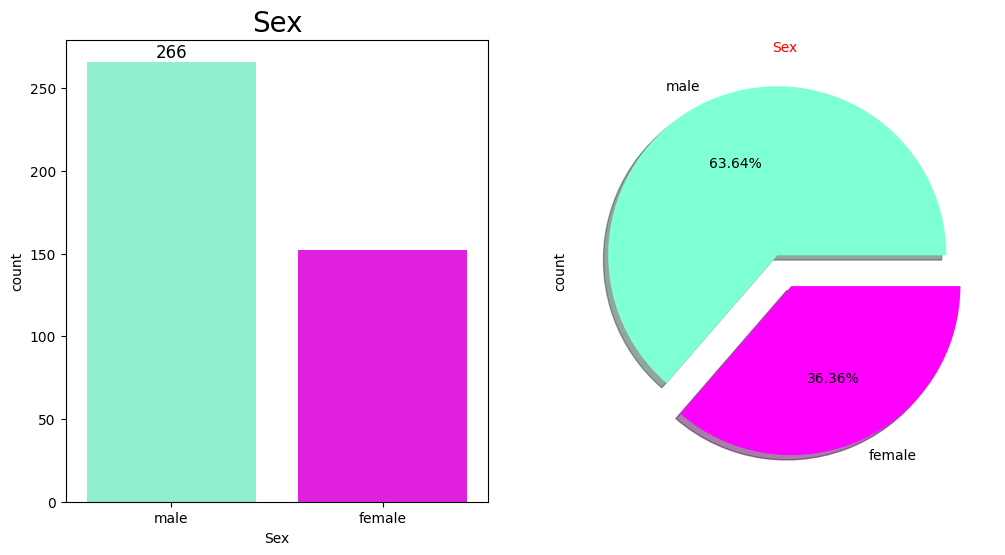

In [11]:
colors = ["Aquamarine", "Magenta"]

plt.figure(figsize=(12, 6))

# Subplot 1
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=titanic, palette=colors)
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")  # Add labels to the bars
plt.title("Sex", fontsize=20)

# Subplot 2
ax2 = plt.subplot(1, 2, 2)
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=colors, ax=ax2)
ax2.set_title(label="Sex", fontsize=20, color='Red', font='Lucida Calligraphy')

plt.show()

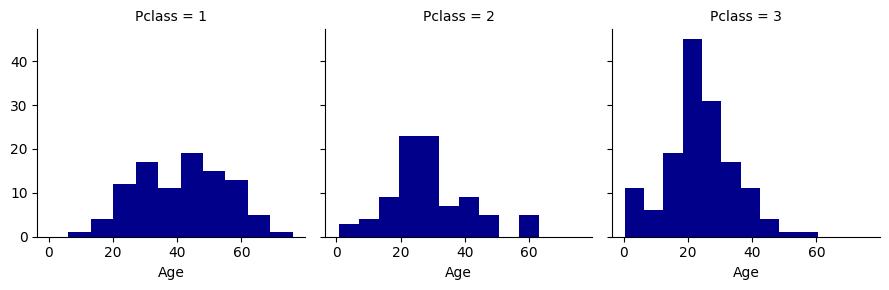

In [12]:
grape_color = "#00008B"

# Create a FacetGrid
g = sns.FacetGrid(titanic, col="Pclass")

# Map the histograms with the specified color
g = g.map(plt.hist, "Age", color=grape_color)

# Show the plot
plt.show()


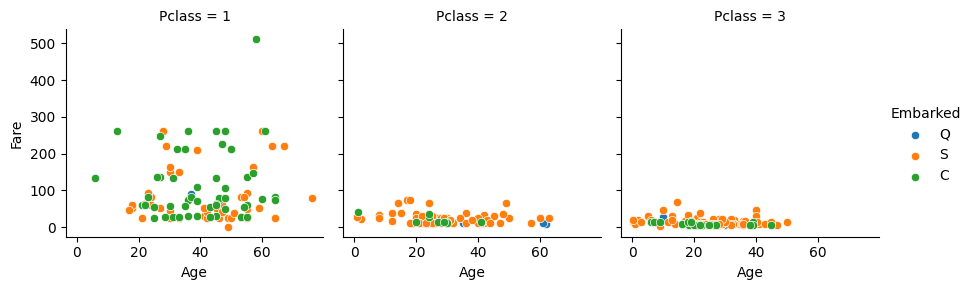

In [13]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


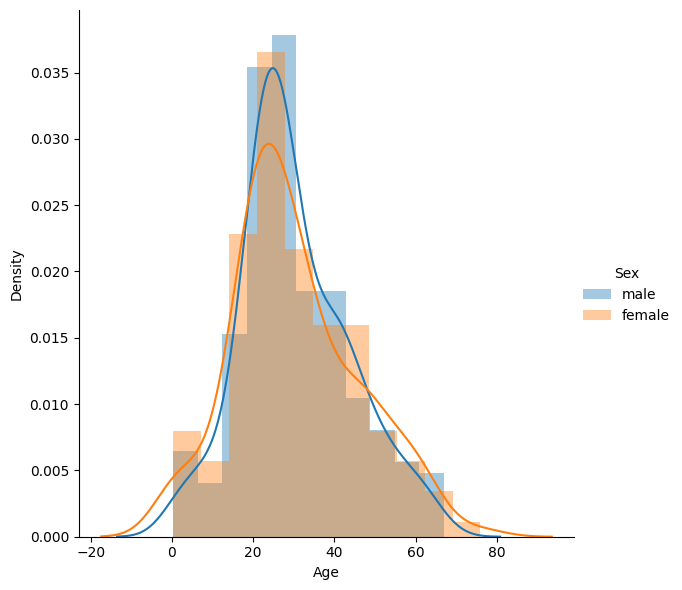

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

<ipython-input-16-f618ef991531>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'],color="g")


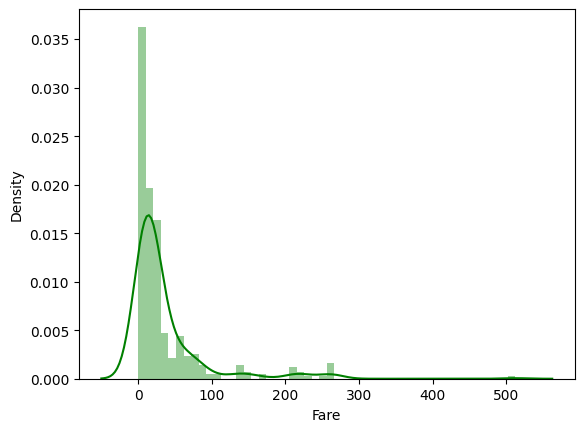

In [16]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

<ipython-input-17-1d4f79e05c1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)


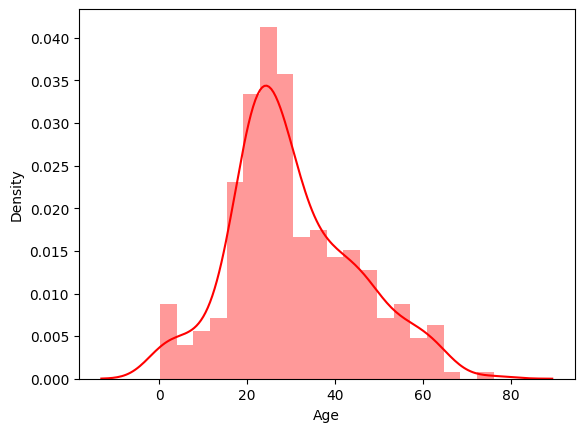

In [17]:
sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)
plt.show()

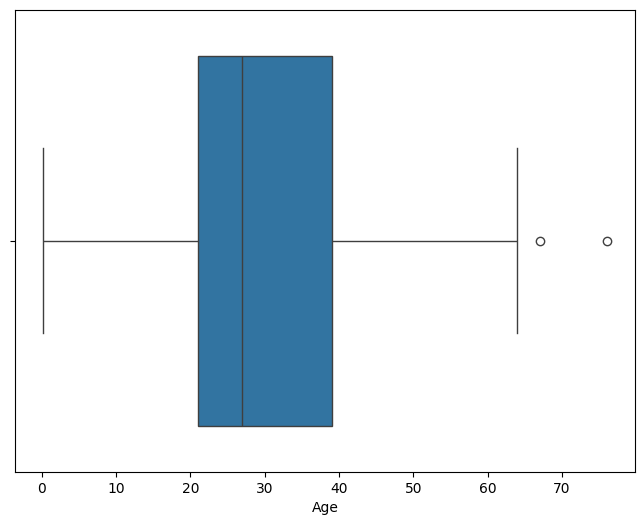

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic["Age"])
plt.show()

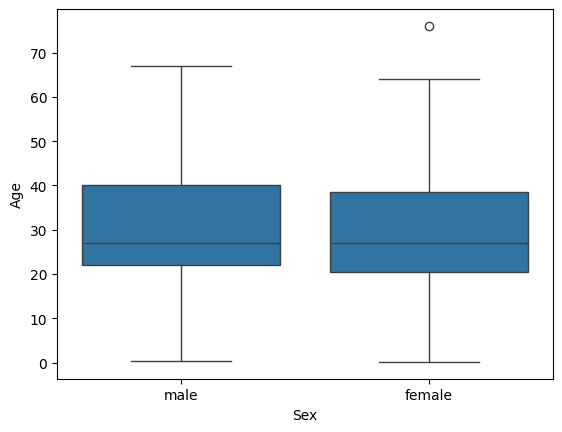

In [19]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

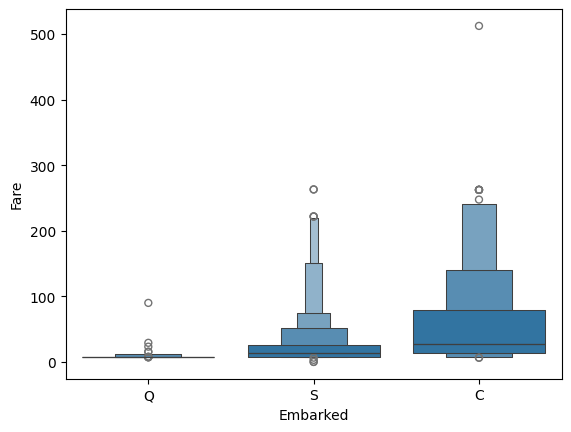

In [20]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

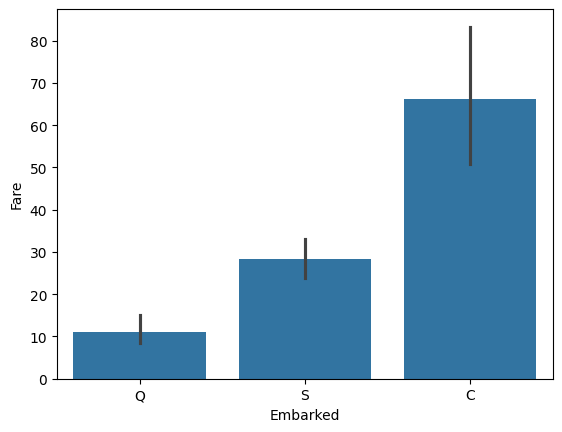

In [21]:
sns.barplot(y='Fare',x='Embarked',data=titanic)
plt.show()

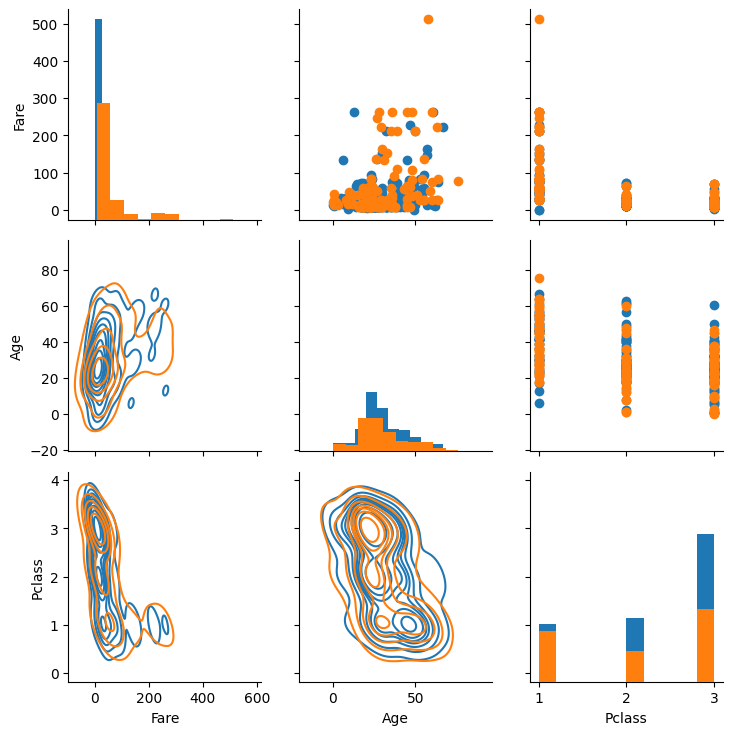

In [22]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

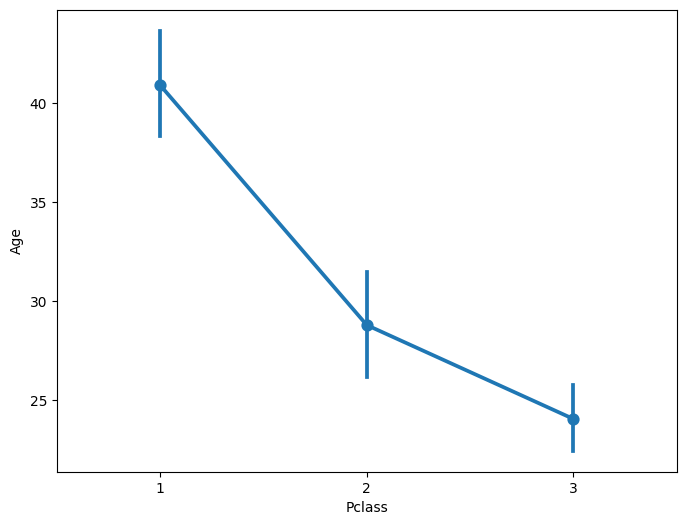

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=titanic)
plt.show()

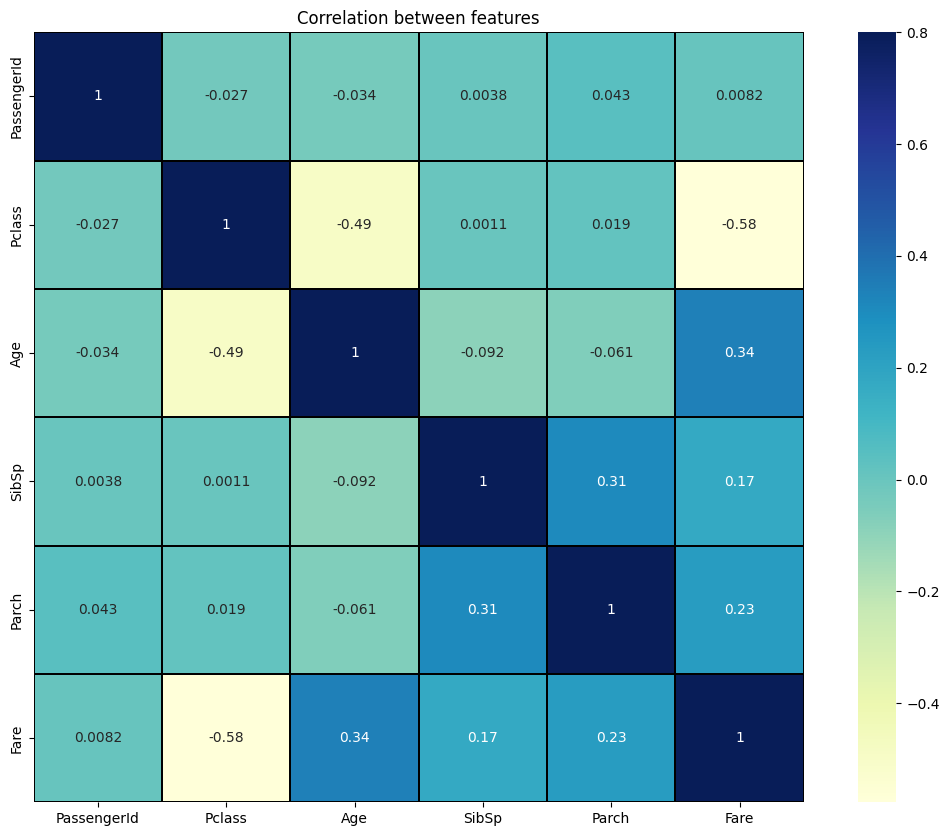

In [24]:
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])

corr = numeric_columns.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

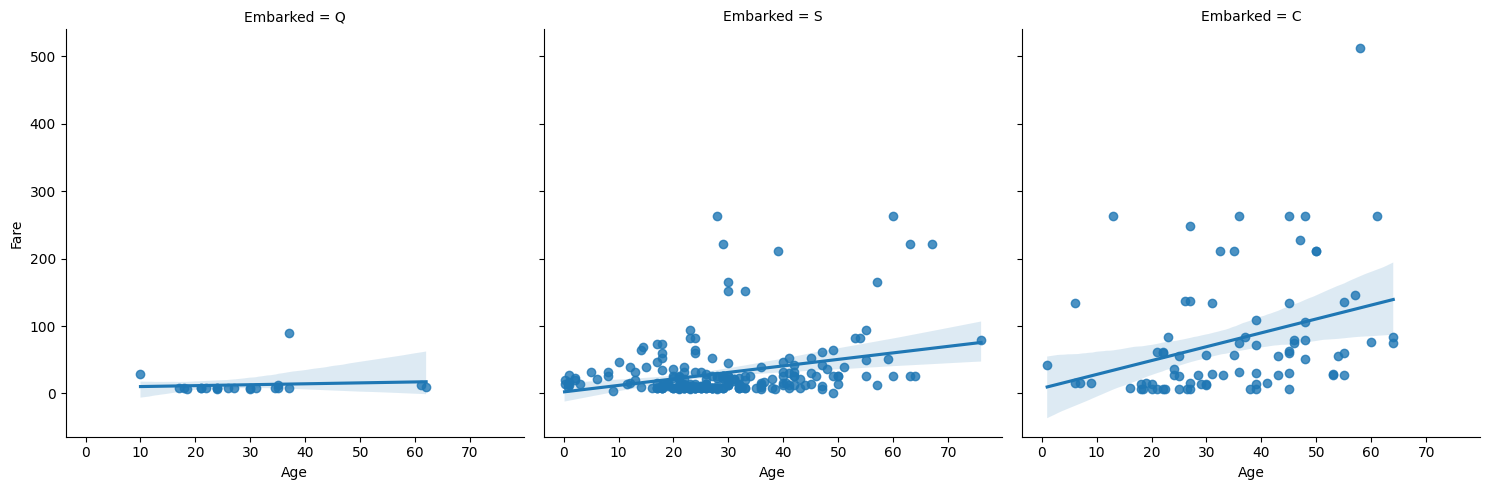

In [25]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=titanic)

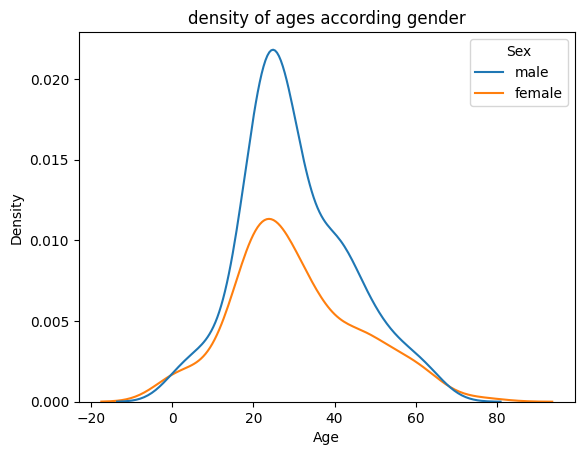

In [26]:
sns.kdeplot(data = titanic , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

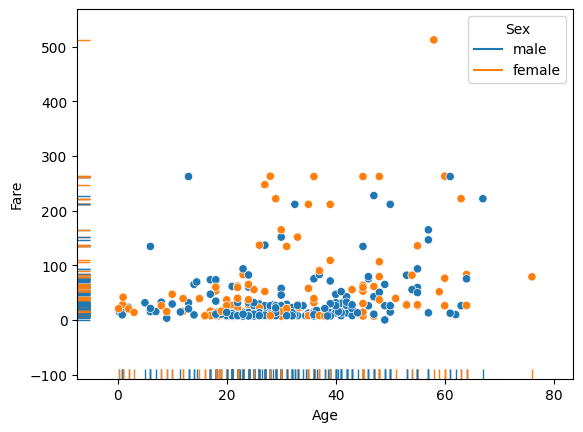

In [27]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=titanic, x="Age", y="Fare", hue="Sex")
plt.show()

In [28]:
titanic.isnull().sum().sort_values(ascending= False)

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


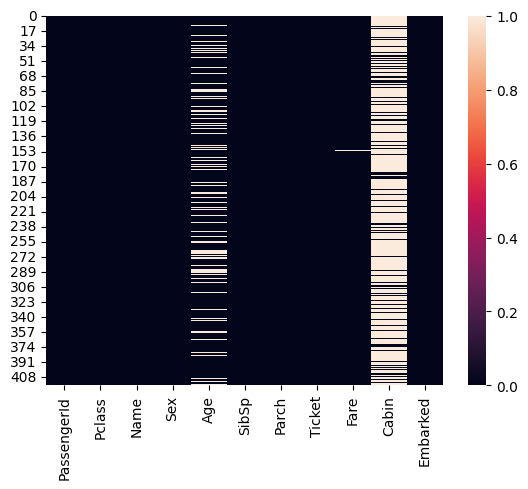

In [30]:
sns.heatmap(titanic.isnull());

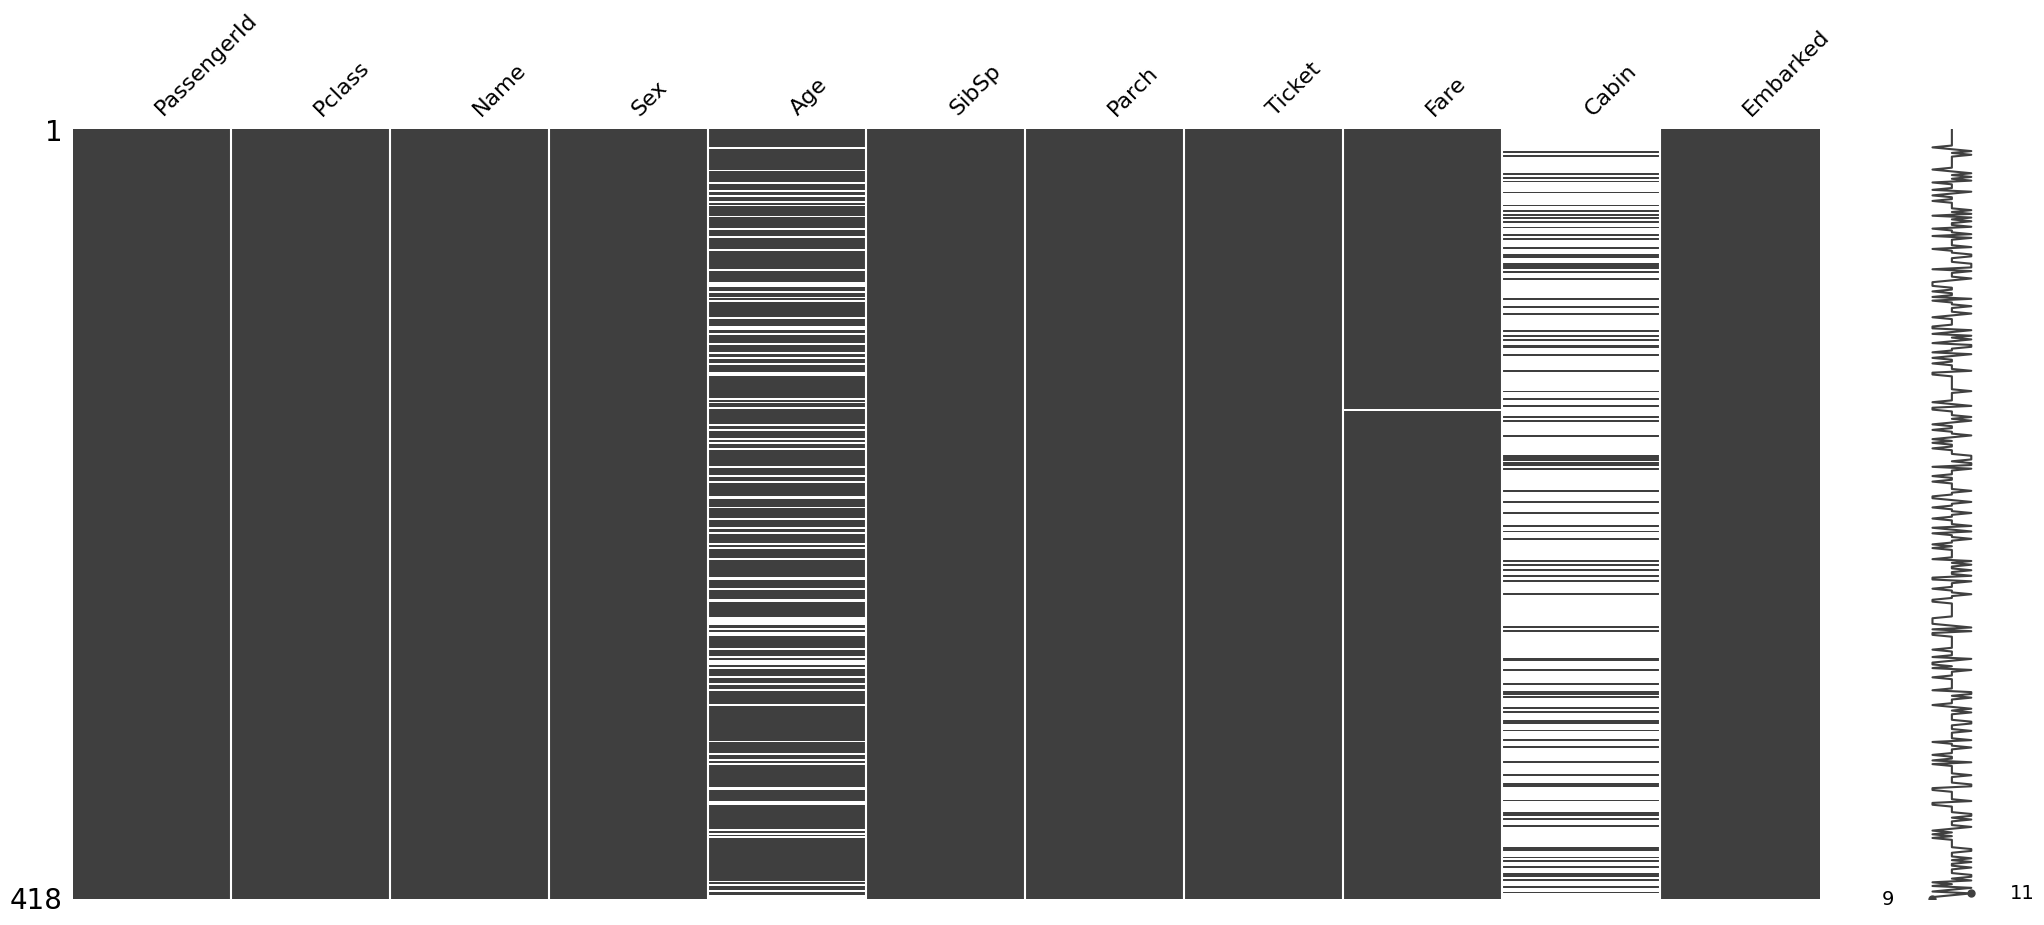

In [31]:
import missingno as msno
msno.matrix(titanic)
plt.show()

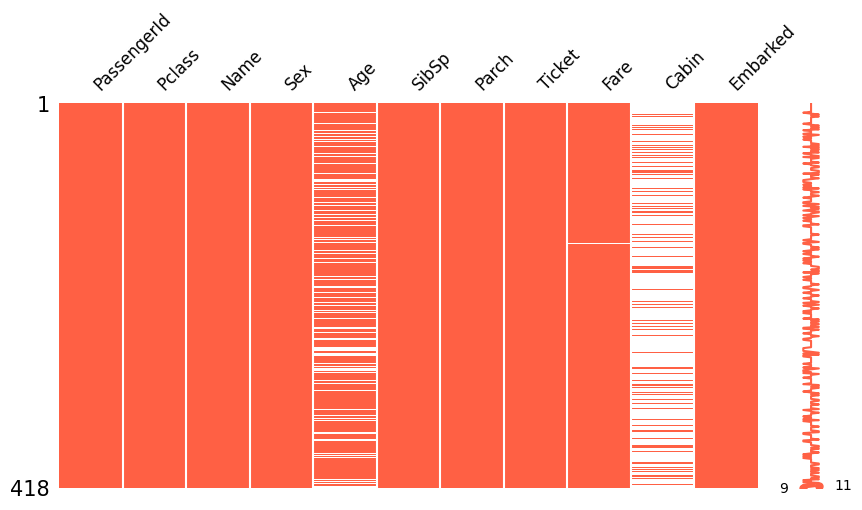

In [32]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [33]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

<ipython-input-33-42a0a8b02868>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')


In [34]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


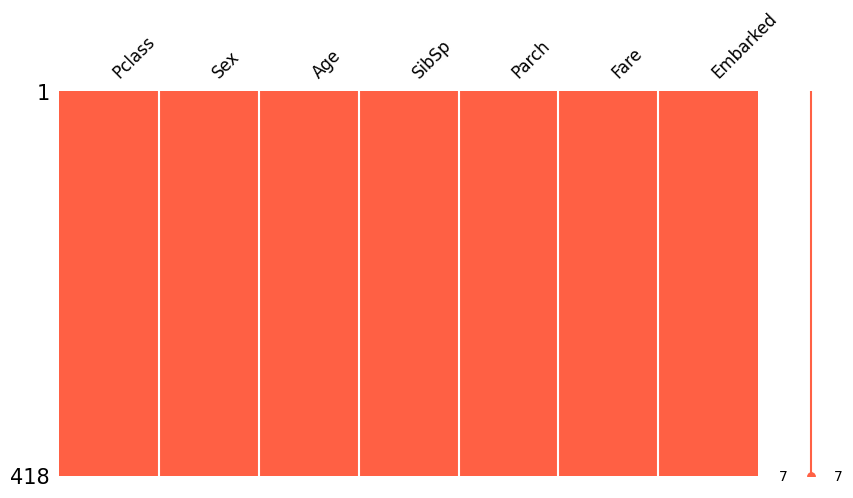

In [35]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));